In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import re, string
import matplotlib.pyplot as plt
import seaborn as sns
import dtale

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

#### EDA

In [3]:
df_fake.sample(5)


title  \
6624    Trump Disproves The Effectiveness Of Walls As...   
11440  SHOCKER! CNN POLITICAL DIRECTOR On Trump’s Fir...   
18215  DEMOCRAT HEADS SET TO EXPLODE: Feds Waive Envi...   
14938  FORMER CIA AGENT SAYS OBAMA WORKING WITH MUSLI...   
20194  TRUMP SAYS “NO” To Pro-Amnesty Koch Brother’s ...   

                                                    text    subject  \
6624   Since the beginning of Donald Trump s campaign...       News   
11440                                                      politics   
18215  The Department of Homeland Security announced ...  left-news   
14938  Former CIA Agent, Clare Lopez has been ringing...   politics   
20194  Meanwhile, the Koch brothers are denying they ...  left-news   

                 date  
6624   April 30, 2016  
11440    Mar 11, 2017  
18215     Aug 3, 2017  
14938    Nov 13, 2015  
20194    Jul 30, 2016

In [4]:
dtale.show(df_fake)

In [5]:
df_true.sample(5)

title  \
13370  Cameroon secessionists kill six soldiers, poli...   
15406  Chinese fans prepare to welcome rich, powerful...   
17752  UK government softens immigration rules for Gr...   
5102   McCain calls on Trump to back up wire-tapping ...   
13135  Stopping militancy spread in ASEAN a priority ...   

                                                    text       subject  \
13370  YAOUNDE (Reuters) - Militants seeking independ...     worldnews   
15406  BEIJING (Reuters) - He may be a divisive figur...     worldnews   
17752  LONDON (Reuters) - Illegal immigrants who surv...     worldnews   
5102   WASHINGTON (Reuters) - U.S. Senator John McCai...  politicsNews   
13135  SINGAPORE (Reuters) - Southeast Asian countrie...     worldnews   

                    date  
13370  December 1, 2017   
15406  November 7, 2017   
17752  October 11, 2017   
5102      March 6, 2017   
13135  December 5, 2017

In [6]:
print("Fake news dataset shape", df_fake.shape)
print("Real news dataset shape", df_true.shape)

Fake news dataset shape (23481, 4)
Real news dataset shape (21417, 4)


In [7]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [9]:
print("Fake News")
print(df_fake.subject.value_counts())


Fake News
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64


In [10]:

print("Real News")
print( df_true.subject.value_counts())

Real News
politicsNews    11272
worldnews       10145
Name: subject, dtype: int64


In [11]:
print("Fake News")
print( df_fake.date.value_counts())

Fake News
May 10, 2017                                                                                                                                             46
May 26, 2016                                                                                                                                             44
May 5, 2016                                                                                                                                              44
May 6, 2016                                                                                                                                              44
May 11, 2016                                                                                                                                             43
                                                                                                                                                         ..
https://100percentfedup.com/12-yr-old-black-conservati

In [12]:
type(df_fake['date'][1])

str

In [13]:
df_fake.date.str.contains(r'https://').sum()

9

In [14]:
df_fake = df_fake[~df_fake.date.str.startswith('https://')]

In [15]:
df_fake[~(df_fake.date.str.len() <19)]

2021-06-12 12:41:09,072 - INFO     - NumExpr defaulting to 4 threads.


title                                               text    subject  \
18933  Homepage  [vc_row][vc_column width= 1/1 ][td_block_trend...  left-news   

                                                    date  
18933  MSNBC HOST Rudely Assumes Steel Worker Would N...

In [16]:
df_fake = df_fake[~df_fake.date.str.startswith('MSNBC HOST')]

In [17]:
print("Fake News")
print( df_fake.date.value_counts())

Fake News
May 10, 2017         46
May 5, 2016          44
May 6, 2016          44
May 26, 2016         44
May 11, 2016         43
                     ..
October 9, 2017       1
14-Feb-18             1
December 22, 2017     1
December 4, 2017      1
October 22, 2017      1
Name: date, Length: 1675, dtype: int64


In [18]:
# date formating is inconssitent we need to change

In [19]:
print("Real News")
print( df_true.date.value_counts())

Real News
December 20, 2017      182
December 6, 2017       166
November 30, 2017      162
November 9, 2017       158
October 13, 2017       155
                      ... 
September 11, 2016       1
August 21, 2016          1
May 14, 2016             1
June 24, 2017            1
December 30, 2017        1
Name: date, Length: 716, dtype: int64


In [20]:
df_fake['date_only'] = pd.to_datetime(df_fake['date'])
df_true['date_only'] = pd.to_datetime(df_true['date'])

In [21]:
df_fake['year'] = df_fake['date_only'].dt.year
df_true['year'] = df_true['date_only'].dt.year

df_fake['month'] = df_fake['date_only'].dt.month
df_true['month'] = df_true['date_only'].dt.month

df_fake['day'] = df_fake['date_only'].dt.day
df_true['day'] = df_true['date_only'].dt.day

df_fake['week_day'] = df_fake['date_only'].dt.weekday
df_true['week_day'] = df_true['date_only'].dt.weekday


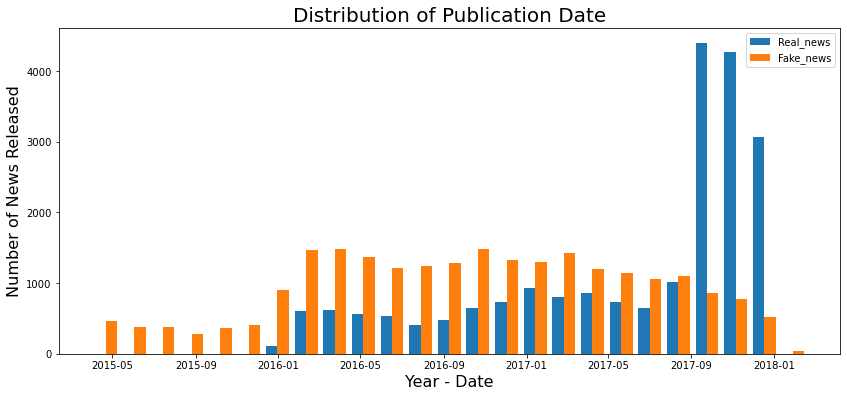

In [22]:
plt.show()

true = (df_true['date_only'])
fake = (df_fake['date_only'])

plt.figure(figsize = (14,6))
plt.title("Distribution of Publication Date", fontsize=20)
plt.hist([true, fake], bins = 25)
plt.legend(["Real_news", "Fake_news"])
plt.ylabel("Number of News Released", fontsize=16)
plt.xlabel("Year - Date",fontsize=16)
plt.show()

Here we can tell that Fake news dates are more evently distrubuted and real news happened more in to 2017 to 2018

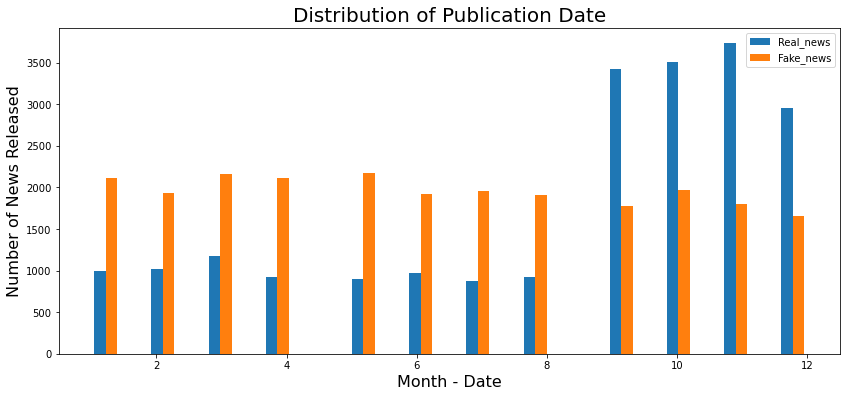

In [23]:
plt.show()

true = (df_true['month'])
fake = (df_fake['month'])

plt.figure(figsize = (14,6))
plt.title("Distribution of Publication Date", fontsize=20)
plt.hist([true, fake], bins = 25)
plt.legend(["Real_news", "Fake_news"])
plt.ylabel("Number of News Released", fontsize=16)
plt.xlabel("Month - Date",fontsize=16)
plt.show()

Fake news evenly distributed by month but the Real news mostly October to December 

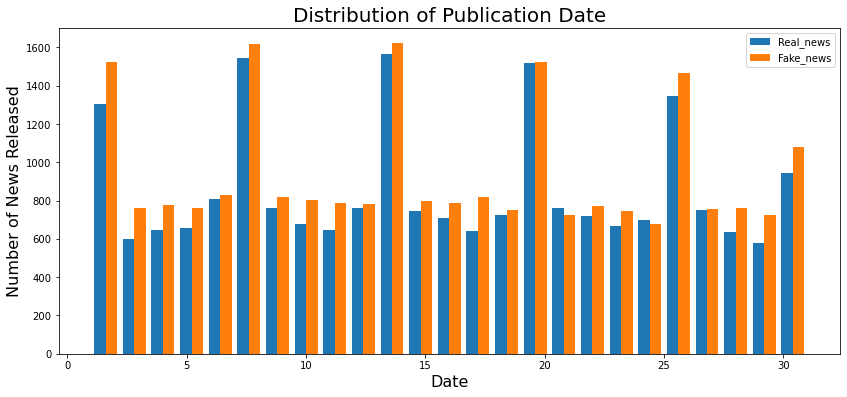

In [24]:
plt.show()

true = (df_true['day'])
fake = (df_fake['day'])

plt.figure(figsize = (14,6))
plt.title("Distribution of Publication Date", fontsize=20)
plt.hist([true, fake], bins = 25)
plt.legend(["Real_news", "Fake_news"])
plt.ylabel("Number of News Released", fontsize=16)
plt.xlabel("Date",fontsize=16)
plt.show()

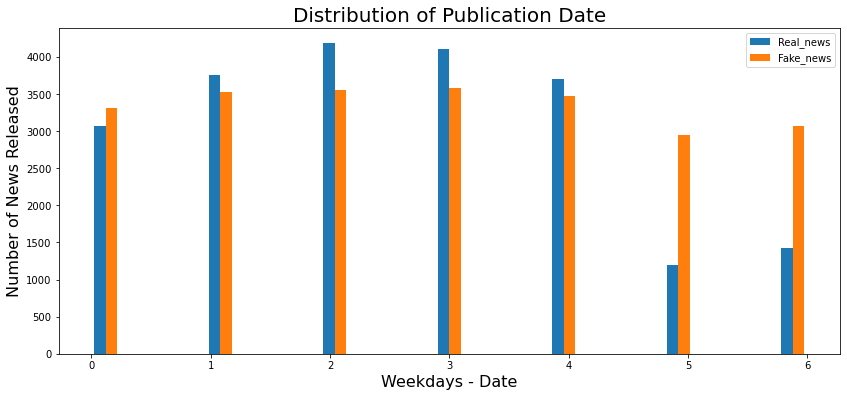

In [25]:
plt.show()

true = (df_true['week_day'])
fake = (df_fake['week_day'])

plt.figure(figsize = (14,6))
plt.title("Distribution of Publication Date", fontsize=20)
plt.hist([true, fake], bins = 25)
plt.legend(["Real_news", "Fake_news"])
plt.ylabel("Number of News Released", fontsize=16)
plt.xlabel("Weekdays - Date",fontsize=16)
plt.show()

More Real news realized during weekday

In [26]:
df_true['week_day'].unique()

array([6, 4, 5, 3, 0, 2, 1])

In [27]:
df_true['target'] = 1
df_fake['target'] = 0

In [28]:
combined_df = [df_true, df_fake]
df = pd.concat(combined_df)

In [29]:
#Resetting the index since combining 2 df creates duplicate indexes
df.reset_index(drop=True, inplace=True)

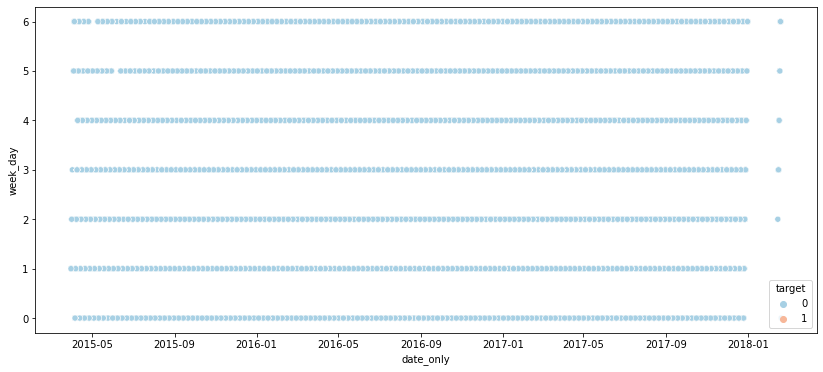

In [30]:
plt.show()
plt.figure(figsize = (14,6))
sns.scatterplot(x='date_only', y = 'week_day', data = df, hue='target',
               palette="RdBu_r")

plt.show()

In [31]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  date_only  year  month  day  week_day  target  
0  December 31, 2017  2017-12-31  2017     12   31         6       1  
1  December 29, 2017  2017-12-29  2017     12   29         4       1  
2  December 31, 2017  2017-12-31  2017     12   31         6       1  
3  December 30, 2017  2017-12-30  2017     12   30         5       1  
4  December 29, 2017  2017-12-29  2017     12   29         4       1

In [32]:
df[['date_only','week_day','target']].head()

date_only  week_day  target
0 2017-12-31         6       1
1 2017-12-29         4       1
2 2017-12-31         6       1
3 2017-12-30         5       1
4 2017-12-29         4       1

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44888 entries, 0 to 44887
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      44888 non-null  object        
 1   text       44888 non-null  object        
 2   subject    44888 non-null  object        
 3   date       44888 non-null  object        
 4   date_only  44888 non-null  datetime64[ns]
 5   year       44888 non-null  int64         
 6   month      44888 non-null  int64         
 7   day        44888 non-null  int64         
 8   week_day   44888 non-null  int64         
 9   target     44888 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 3.4+ MB


In [34]:
df.columns

Index(['title', 'text', 'subject', 'date', 'date_only', 'year', 'month', 'day',
       'week_day', 'target'],
      dtype='object')

In [35]:
df_date= df[['title','text','subject','date','date_only', 'year', 'month','day','week_day', 'target']]

In [36]:
df_date.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  date_only  year  month  day  week_day  target  
0  December 31, 2017  2017-12-31  2017     12   31         6       1  
1  December 29, 2017  2017-12-29  2017     12   29         4       1  
2  December 31, 2017  2017-12-31  2017     12   31         6       1  
3  December 30, 2017  2017-12-30  2017     12   30         5       1  
4  December 29, 2017  2017-12-29  2017     12   29         4       1

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44888 entries, 0 to 44887
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      44888 non-null  object        
 1   text       44888 non-null  object        
 2   subject    44888 non-null  object        
 3   date       44888 non-null  object        
 4   date_only  44888 non-null  datetime64[ns]
 5   year       44888 non-null  int64         
 6   month      44888 non-null  int64         
 7   day        44888 non-null  int64         
 8   week_day   44888 non-null  int64         
 9   target     44888 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 3.4+ MB


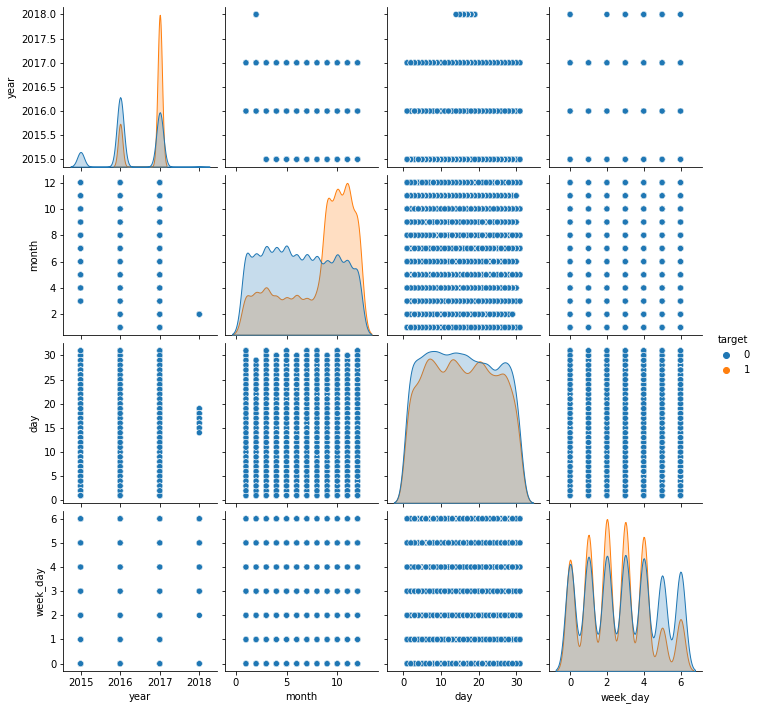

In [38]:
sns.pairplot(df_date, hue ='target')

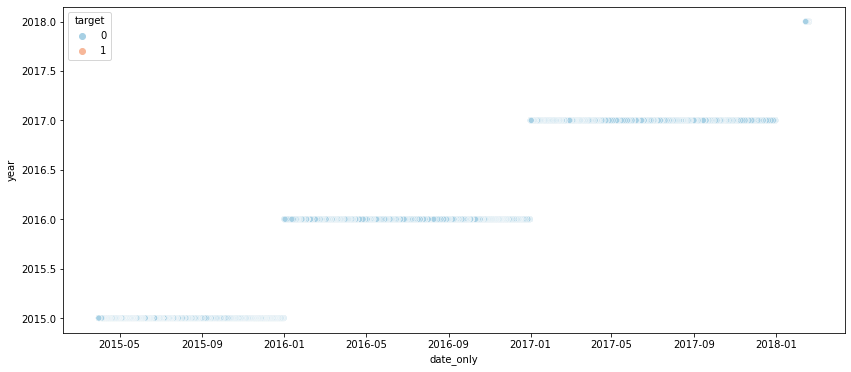

In [39]:
plt.show()
plt.figure(figsize = (14,6))
sns.scatterplot(x='date_only', y = 'year', data = df_date, hue='target',
               palette="RdBu_r")

plt.show()

In [40]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge

In [41]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  date_only  year  month  day  week_day  target  
0  December 31, 2017  2017-12-31  2017     12   31         6       1  
1  December 29, 2017  2017-12-29  2017     12   29         4       1  
2  December 31, 2017  2017-12-31  2017     12   31         6       1  
3  December 30, 2017  2017-12-30  2017     12   30         5       1  
4  December 29, 2017  2017-12-29  2017     12   29         4       1

In [42]:
df_date_only = df[['date', 'date_only', 'year', 'month', 'day',
       'week_day','target']].copy()

In [43]:
df_date_only

date  date_only  year  month  day  week_day  target
0      December 31, 2017  2017-12-31  2017     12   31         6       1
1      December 29, 2017  2017-12-29  2017     12   29         4       1
2      December 31, 2017  2017-12-31  2017     12   31         6       1
3      December 30, 2017  2017-12-30  2017     12   30         5       1
4      December 29, 2017  2017-12-29  2017     12   29         4       1
...                   ...        ...   ...    ...  ...       ...     ...
44883    January 16, 2016 2016-01-16  2016      1   16         5       0
44884    January 16, 2016 2016-01-16  2016      1   16         5       0
44885    January 15, 2016 2016-01-15  2016      1   15         4       0
44886    January 14, 2016 2016-01-14  2016      1   14         3       0
44887    January 12, 2016 2016-01-12  2016      1   12         1       0

[44888 rows x 7 columns]

In [44]:
df_date_only['date_only'][1]

Timestamp('2017-12-29 00:00:00')

In [45]:
X = df_date_only.iloc[:,2].values
y= df['target']

In [46]:
X = X.reshape(-1,1)

In [47]:
model = LinearRegression()

In [48]:
model = model.fit(X,y)
y_pred = model.predict(X)

model.score(X,y)

0.16594149187051244

In [49]:
y_pred

array([0.63840856, 0.63840856, 0.63840856, ..., 0.29998555, 0.29998555,
       0.29998555])

In [50]:
lr = LogisticRegression()

In [51]:
lr = lr.fit(X, y)
y_pred = lr.predict(X)
lr.score(X,y)

0.5228791659240777

In [52]:
ridge = Ridge()

In [53]:
ridge = ridge.fit(X,y)

In [54]:
y_pred = ridge.predict(X)
ridge.score(X,y)

0.16594149124026625

In [61]:
df_true['text_1'] = df_true['text'].str.extract('(-.*)$', expand = True)

In [62]:
df_true['text_1'] = df_true['text_1'].str[2:]

In [63]:
df_true['text_1'][0]

'The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific researc

In [64]:
df_true.shape

(21417, 11)

In [66]:
df_true[df_true['text_1'].isna()]

title  \
8247  Obama drinks coconut water to cool down in Laos   
8970                   Graphic: Supreme Court roundup   

                                                   text       subject  \
8247  U.S. President Barack Obama visited a street m...  politicsNews   
8970                                                     politicsNews   

                    date  date_only  year  month  day  week_day  target text_1  
8247  September 7, 2016  2016-09-07  2016      9    7         2       1    NaN  
8970      June 16, 2016  2016-06-16  2016      6   16         3       1    NaN

In [67]:
df_true['text'][8247]

'U.S. President Barack\xa0Obama\xa0visited a street market in Luang Prabang on Wednesday (September 7), where he greeted residents and tasted fresh\xa0coconut. He walked near the river of Mekong where women sell\xa0coconut\xa0drinks and tasted the local refreshment, posing for photographs and conversing with locals. Obama\xa0arrived in Laos Tuesday morning (September 6), becoming the first sitting U.S. president to visit landlocked Laos, where the United States waged a “secret war” while fighting in Vietnam, dropping an estimated two million tonnes of bombs on the country. Obama’s visit follows his attendance at the G20 summit in the Chinese city of Hangzhou. He is also due to attend an annual international gathering in the Southeast Asian region.'

In [68]:
#let's drop the empty strings rows

df_true = df_true[df_true.text !=' ']

In [69]:
df_true[df_true['text_1'].isna()]

title  \
8247  Obama drinks coconut water to cool down in Laos   

                                                   text       subject  \
8247  U.S. President Barack Obama visited a street m...  politicsNews   

                    date  date_only  year  month  day  week_day  target text_1  
8247  September 7, 2016  2016-09-07  2016      9    7         2       1    NaN

In [70]:
df_true = df_true.dropna()
df_true = df_true.reset_index(drop=True)

In [71]:
df_true.shape

(21415, 11)

In [72]:
df_fake = df_fake.drop(['date'], axis=1)
df_true = df_true.drop(['text','date'], axis=1)

In [73]:
df_true = df_true.rename(columns ={"text_1":"text"})

In [74]:
df_true.head()

title       subject  date_only  \
0  As U.S. budget fight looms, Republicans flip t...  politicsNews 2017-12-31   
1  U.S. military to accept transgender recruits o...  politicsNews 2017-12-29   
2  Senior U.S. Republican senator: 'Let Mr. Muell...  politicsNews 2017-12-31   
3  FBI Russia probe helped by Australian diplomat...  politicsNews 2017-12-30   
4  Trump wants Postal Service to charge 'much mor...  politicsNews 2017-12-29   

   year  month  day  week_day  target  \
0  2017     12   31         6       1   
1  2017     12   29         4       1   
2  2017     12   31         6       1   
3  2017     12   30         5       1   
4  2017     12   29         4       1   

                                                text  
0  The head of a conservative Republican faction ...  
1  Transgender people will be allowed for the fir...  
2  The special counsel investigation of links bet...  
3  Trump campaign adviser George Papadopoulos tol...  
4  President Donald Trump called on the U.S. Post...

In [75]:
df_fake = df_fake[['title', 'subject', 'date_only', 'text']]

In [76]:
df_fake.head()

title subject  date_only  \
0   Donald Trump Sends Out Embarrassing New Year’...    News 2017-12-31   
1   Drunk Bragging Trump Staffer Started Russian ...    News 2017-12-31   
2   Sheriff David Clarke Becomes An Internet Joke...    News 2017-12-30   
3   Trump Is So Obsessed He Even Has Obama’s Name...    News 2017-12-29   
4   Pope Francis Just Called Out Donald Trump Dur...    News 2017-12-25   

                                                text  
0  Donald Trump just couldn t wish all Americans ...  
1  House Intelligence Committee Chairman Devin Nu...  
2  On Friday, it was revealed that former Milwauk...  
3  On Christmas day, Donald Trump announced that ...  
4  Pope Francis used his annual Christmas Day mes...

In [77]:
df_true['target'] = 'real'
df_fake['target'] ='fake'

In [78]:
df_true.head()

title       subject  date_only  \
0  As U.S. budget fight looms, Republicans flip t...  politicsNews 2017-12-31   
1  U.S. military to accept transgender recruits o...  politicsNews 2017-12-29   
2  Senior U.S. Republican senator: 'Let Mr. Muell...  politicsNews 2017-12-31   
3  FBI Russia probe helped by Australian diplomat...  politicsNews 2017-12-30   
4  Trump wants Postal Service to charge 'much mor...  politicsNews 2017-12-29   

   year  month  day  week_day target  \
0  2017     12   31         6   real   
1  2017     12   29         4   real   
2  2017     12   31         6   real   
3  2017     12   30         5   real   
4  2017     12   29         4   real   

                                                text  
0  The head of a conservative Republican faction ...  
1  Transgender people will be allowed for the fir...  
2  The special counsel investigation of links bet...  
3  Trump campaign adviser George Papadopoulos tol...  
4  President Donald Trump called on the U.S. Post...

In [79]:
combined_df = [df_true, df_fake]
df = pd.concat(combined_df)

In [80]:
#Resetting the index since combining 2 df creates duplicate indexes
df.reset_index(drop=True, inplace=True)

In [81]:
#Mostly positive reviews but date is pretty evenly distributed

df.target.value_counts(normalize=True)

fake    0.522902
real    0.477098
Name: target, dtype: float64

In [82]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/unachka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
stop_words = stopwords.words('english')

In [84]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
spelling = lambda x: re.sub("(.)\\1{2,}", "\\1", x)

df['text'] = df.text.map(alphanumeric).map(punc_lower).map(spelling)

In [85]:
df['text'][4][:150]

'president donald trump called on the u s  postal service on friday to charge “much more” to ship packages for amazon  amzn o picking another fight wit'

In [87]:
#R Remove stop words
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))


### Vectorization and Topic Modeling 

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE


In [89]:
cv = CountVectorizer()
doc_word = cv.fit_transform(df["text"])
pd.DataFrame(doc_word.toarray(), columns=cv.get_feature_names())

aa  aab  aaba  aabo  aaccording  aachen  aadhaar  aadhar  aadl  aaf  \
0       0    0     0     0           0       0        0       0     0    0   
1       0    0     0     0           0       0        0       0     0    0   
2       0    0     0     0           0       0        0       0     0    0   
3       0    0     0     0           0       0        0       0     0    0   
4       0    0     0     0           0       0        0       0     0    0   
...    ..  ...   ...   ...         ...     ...      ...     ...   ...  ...   
44881   0    0     0     0           0       0        0       0     0    0   
44882   0    0     0     0           0       0        0       0     0    0   
44883   0    0     0     0           0       0        0       0     0    0   
44884   0    0     0     0           0       0        0       0     0    0   
44885   0    0     0     0           0       0        0       0     0    0   

       ...  zyklon  zynga  zypries  zyries  zyuganov  zz  zzbluecomet  \
0      ...       0      0        0       0         0   0            0   
1      ...       0      0        0       0         0   0            0   
2      ...       0      0        0       0         0   0            0   
3      ...       0      0        0       0         0   0            0   
4      ...       0      0        0       0         0   0            0   
...    ...     ...    ...      ...     ...       ...  ..          ...   
44881  ...       0      0        0       0         0   0            0   
44882  ...       0      0        0       0         0   0            0   
44883  ...       0      0        0       0         0   0            0   
44884  ...       0      0        0       0         0   0            0   
44885  ...       0      0        0       0         0   0            0   

       zzjjpdaivn  zztaine  émigré  
0               0        0       0  
1               0        0       0  
2               0        0       0  
3               0        0       0  
4               0        0       0  
...           ...      ...     ...  
44881           0        0       0  
44882           0        0       0  
44883           0        0       0  
44884           0        0       0  
44885           0        0       0  

[44886 rows x 105169 columns]

In [90]:
# Over 100K Unique words

In [91]:
def vectorize(data, vectorizer, binary):
    if vectorizer == "cv":
        if binary == True:
            vec = CountVectorizer(stop_words, ngram_range=(1, 3), binary=True)
        else:
            vec = CountVectorizer(stop_words, ngram_range=(1, 3))
    elif vectorizer == "tfidf":
        vec = TfidfVectorizer(stop_words, ngram_range=(1, 3))

    doc_word = vec.fit_transform(data)
    feature_names = vec.get_feature_names()
    id2word = dict((v, k) for k, v in vec.vocabulary_.items())
    
    return doc_word, feature_names, id2word

In [92]:
def lsa(doc_word, feature_names, num_topics):
    model = TruncatedSVD(num_topics)
    doc_topic = model.fit_transform(doc_word)
    for ix, topic in enumerate(model.components_):
        print("\nTopic ", ix)
        print(", ".join([feature_names[i] for i in topic.argsort()[:-21:-1]]))

def nmf(doc_word, feature_names, num_topics):
    model = NMF(num_topics)
    doc_topic = model.fit_transform(doc_word)
    for ix, topic in enumerate(model.components_):
        print("\nTopic ", ix)
        print(", ".join([feature_names[i] for i in topic.argsort()[:-21:-1]]))

def lda(doc_word, feature_names, id2word, num_topics):
    corpus = matutils.Sparse2Corpus(doc_word.transpose())
    model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=5, random_state=42)
    topics = model.print_topics()
    for n, topic in topics:
        print("\nTopic ", n)
        print(topic)

  

In [93]:
doc_word, feature_names, id2word = vectorize(df, "cv", False)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass input=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few

In [94]:
lsa(doc_word, feature_names, 4)


Topic  0
text, subject, year, month, date_only, day, week_day, target, title

Topic  1
subject, week_day, target, date_only, year, title, text, day, month

Topic  2
date_only, year, week_day, title, text, target, subject, month, day

Topic  3
target, text, title, subject, date_only, day, week_day, month, year


In [95]:
nmf(doc_word, feature_names, 4)


Topic  0
date_only, year, week_day, title, text, target, subject, month, day

Topic  1
day, title, subject, year, week_day, text, target, month, date_only

Topic  2
subject, target, week_day, year, title, text, month, day, date_only

Topic  3
year, month, week_day, title, text, target, subject, day, date_only


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



In [96]:
def vectorize(data, vectorizer, binary):
    if vectorizer == "cv":
        if binary == True:
            vec = CountVectorizer(stop_words, ngram_range=(1, 3), binary=True)
        else:
            vec = CountVectorizer(stop_words, ngram_range=(1, 3))
    elif vectorizer == "tfidf":
        vec = TfidfVectorizer(stop_words, ngram_range=(1, 3))

    doc_word = vec.fit_transform(data)
    feature_names = vec.get_feature_names()
    id2word = dict((v, k) for k, v in vec.vocabulary_.items())
    
    return doc_word, feature_names, id2word

In [97]:
def lsa(doc_word, feature_names, num_topics):
    model = TruncatedSVD(num_topics)
    doc_topic = model.fit_transform(doc_word)
    for ix, topic in enumerate(model.components_):
        print("\nTopic ", ix)
        print(", ".join([feature_names[i] for i in topic.argsort()[:-21:-1]]))

def nmf(doc_word, feature_names, num_topics):
    model = NMF(num_topics)
    doc_topic = model.fit_transform(doc_word)
    for ix, topic in enumerate(model.components_):
        print("\nTopic ", ix)
        print(", ".join([feature_names[i] for i in topic.argsort()[:-21:-1]]))

def lda(doc_word, feature_names, id2word, num_topics):
    corpus = matutils.Sparse2Corpus(doc_word.transpose())
    model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=5, random_state=42)
    topics = model.print_topics()
    for n, topic in topics:
        print("\nTopic ", n)
        print(topic)


In [98]:
doc_word, feature_names, id2word = vectorize(df, "cv", False)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass input=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few

In [99]:
lsa(doc_word, feature_names, 4)


Topic  0
text, week_day, subject, title, year, day, date_only, month, target

Topic  1
text, month, date_only, target, week_day, year, title, subject, day

Topic  2
subject, month, day, text, year, date_only, title, target, week_day

Topic  3
target, title, text, subject, month, date_only, day, week_day, year


In [100]:
nmf(doc_word, feature_names, 4)


Topic  0
text, month, title, day, year, week_day, target, subject, date_only

Topic  1
day, week_day, year, title, text, target, subject, month, date_only

Topic  2
subject, year, week_day, text, title, target, month, day, date_only

Topic  3
target, month, year, week_day, title, text, subject, day, date_only


/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



In [101]:
def display_cluster(X,km=[],num_clusters=0):
    alpha = 0.5
    s = 20
    color=["orange", "yellow", "yellowgreen", "forestgreen", "skyblue", "royalblue", "darkorchid", "violet", "deeppink"]
    if num_clusters == 0:
        plt.scatter(X[:,0], X[:,1], alpha=alpha, s=s, c=color[6]) 
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0], X[km.labels_==i,1],alpha=alpha, s=s, c=color[i])
            plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], marker='x', s=100, c=color[i])

display_cluster(doc_topic)